# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le bénéfice d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le bénéfice (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [369]:
import numpy as np  # Numpy pour les calculs numériques
import matplotlib.pyplot as plt  # Matplotlib pour la visualisation des données


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [370]:
# données
data = np.genfromtxt('data.csv', delimiter=',')  # Charger les données à partir du fichier CSV  , ,dtype=int
data.shape  # Afficher la forme (nombre de lignes, nombre de colonnes) des données

(97, 2)

Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le bénéfice (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

Dans la regression lineaire, nous avons une formule qui ressemble a ceci : y= θ0+θ1*x, ou θ0 est l'ordonnee a l'origine ( ou intercept) et θ1 est la pente de la ligne. L'ordonnee a l'origine est la valeur de y lorsque x=0.

X est la matrice des caractéristiques (features). Elle contient toutes les données d'entrée, chaque ligne représentant un exemple et chaque colonne représentant une caractéristique.

Dans la régression linéaire simple, nous avons seulement une caractéristique x, donc X est une matrice de taille (m×2) où 
m est le nombre d'exemples

Dans la régression linéaire, la caractéristique (ou variable indépendante) est la variable que nous utilisons pour prédire la variable dépendante (ou cible). Dans ce cas précis, nous utilisons la population de la ville comme caractéristique pour prédire le bénéfice de l'entreprise.



In [371]:
# Ajout de l'ordonnée à l'origine (theta 0)
X = np.column_stack((np.ones((data.shape[0], 1)), data[:, 0]))  # Empilement des vecteurs pour former la matrice X
print(X.shape)  # Afficher la taille de la matrice X (nombre d'exemples, nombre de caractéristiques + 1)
y = data[:, 1]  # Extraire la colonne de bénéfice pour former le vecteur y

(97, 2)


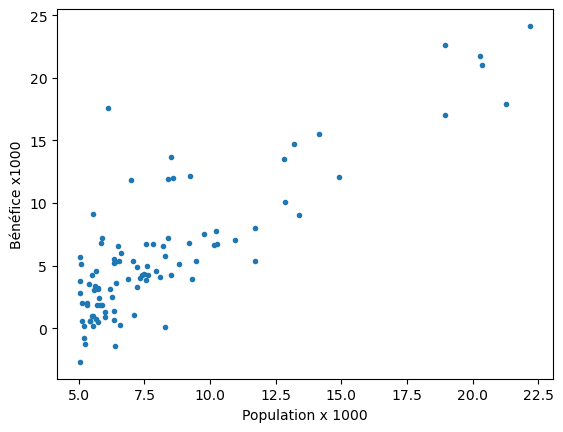

In [372]:
plt.scatter(X[:, 1], y, marker='.')  # Tracé d'un nuage de points pour visualiser la relation entre la population et le bénéfice
plt.xlabel('Population x 1000')  # Étiquette de l'axe x
plt.ylabel('Bénéfice x1000')  # Étiquette de l'axe y

# Ajustement des limites de l'axe x et y pour inclure tous les points
#plt.xlim(X[:, 1].min() - 1, X[:, 1].max() + 1)
#plt.ylim(y.min() - 1, y.max() + 1)

plt.show()  # Afficher le graphique


# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

La fonction de coût mesure l'erreur entre les prédictions du modèle et les valeurs réelles des données d'entraînement.
L'objectif de l'optimisation est de minimiser cette fonction de coût afin d'obtenir les paramètres du modèle qui produisent les prédictions les plus précises

Le tracé du coût consiste à enregistrer la valeur de la fonction de coût à chaque itération de l'algorithme d'optimisation et à représenter graphiquement ces valeurs sur un graphique. Généralement, l'axe des abscisses représente le nombre d'itérations, tandis que l'axe des ordonnées représente la valeur de la fonction de coût.

In [373]:
def computeCostNonVect(X, y, theta):
    # Nombre d'exemples
    m = len(y)
    
    # Initialiser le coût
    J = 0
    
    # Calculer le coût pour chaque exemple
    for i in range(m):
        h = np.dot(X[i], theta)  # Calcul de l'hypothèse pour l'exemple i
        J += (h - y[i]) ** 2  # Ajouter la différence au carré au coût
        
    # Calculer le coût moyen
    J /= (2 * m)
    
    return J


*idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    
*calculer le coût avec et sans vectorisation, 
*comparer le temps de traitement
    

In [374]:
# Fonction de calcul du coût avec vectorisation
def computeCost(X, y, theta):
    m = len(y)
    h = np.dot(X, theta)
    J = np.sum((h - y) ** 2) / (2 * m)
    return J


'''Remarques :

La version vectorisée de la fonction de coût utilise les opérations matricielles de NumPy pour effectuer les calculs de manière efficace.
Comparativement à la version non vectorisée, 
la version vectorisée est généralement plus rapide, car elle évite les boucles explicites sur les exemples d'entraînement.
En général, il est recommandé d'utiliser des opérations vectorielles autant que possible pour améliorer l'efficacité des calculs, 
surtout avec des ensembles de données volumineux.
'''

"Remarques :\n\nLa version vectorisée de la fonction de coût utilise les opérations matricielles de NumPy pour effectuer les calculs de manière efficace.\nComparativement à la version non vectorisée, \nla version vectorisée est généralement plus rapide, car elle évite les boucles explicites sur les exemples d'entraînement.\nEn général, il est recommandé d'utiliser des opérations vectorielles autant que possible pour améliorer l'efficacité des calculs, \nsurtout avec des ensembles de données volumineux.\n"

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

 *garder aussi le cout à chaque itération 
 
 *pour afficher le coût en fonction de theta0 et theta1

In [375]:
def gradientDescentWithoutVectorization(X, y, theta, alpha, iterations):
    # Initialisation d'une liste pour stocker le coût à chaque itération
    J_history = []
    
    # Nombre d'exemples d'entraînement
    m = len(y)
    
    for iteration in range(iterations):
        # Calcul de l'hypothèse du modèle pour tous les exemples
        h = np.dot(X, theta)
        
        # Calcul de l'erreur entre les prédictions et les valeurs réelles
        error = h - y
        
        # Mise à jour des paramètres theta en utilisant la règle de descente du gradient
        gradient = np.dot(X.T, error) / m
        theta -= alpha * gradient
        
        # Calcul du coût actuel et l'ajouter à l'historique des coûts
        cost = computeCostNonVect(X, y, theta)
        J_history.append(cost)
    
    # Retourner les paramètres theta mis à jour et l'historique des coûts
    return theta, J_history

In [376]:
# Fonction de descente du gradient avec vectorisation
def gradientDescent(X, y, theta, alpha, iterations):
    # Initialisation d'une liste pour stocker le coût à chaque itération
    J_history = []
    # Initialisation de listes pour stocker theta0 et theta1
    theta0_history = []
    theta1_history = []
    # Nombre d'exemples d'entraînement
    m = len(y)
    # Initialiser le coût initial
    initial_cost = computeCost(X, y, theta)
    for iteration in range(iterations):
        # Calcul de l'hypothèse du modèle pour tous les exemples
        h = np.dot(X, theta)
        # Calcul de l'erreur entre les prédictions et les valeurs réelles
        error = h - y
        # Mise à jour des paramètres theta en utilisant la règle de descente du gradient
        gradient = np.dot(X.T, error) / m
        theta -= alpha * gradient  # Mettre à jour theta en utilisant le gradient
        # Calcul du coût actuel et l'ajouter à l'historique des coûts
        cost = computeCost(X, y, theta)
        J_history.append(cost)
        # Ajouter theta0 et theta1 à l'historique
        theta0_history.append(theta[0])
        theta1_history.append(theta[1])
    # Calculer le coût final
    final_cost = J_history[-1]
    # Calculer la réduction relative
    relative_reduction = (initial_cost - final_cost) / initial_cost * 100
    print("Coût initial :", initial_cost)
    print("Coût final :", final_cost)
    print("====================================================")
    print("Réduction relative du coût :", relative_reduction, "%")
    print("====================================================")
    # Retourner les paramètres theta mis à jour et l'historique des coûts
    return theta, J_history, theta0_history, theta1_history


# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [377]:
theta = np.zeros(2)

Calculer le cout initial

La différence de performances entre ces deux approches peut entraîner des résultats différents, ce qui explique la grande différence dans les valeurs de coût initial  observée. La version vectorisée est généralement plus rapide et peut produire des résultats plus précis car elle effectue les calculs de manière plus efficace. En revanche, la version non vectorisée est plus sujette à des erreurs de calcul et peut produire des résultats moins précis en raison de la boucle explicite sur les exemples d'entraînement.

In [378]:

initialCost=computeCost(X, y, theta)
print("Coût initial ( avec vectorisation)", initialCost)
print("-----------------------------------------" )
initialcost_non_vect = computeCostNonVect(X, y, theta)
print("cout initial ( without victorisation)",initialcost_non_vect)
#print("la taille de X",X.shape)
#print("la taille de Y",y.shape)
#print("la taille de tetha",theta.shape)

Coût initial ( avec vectorisation) 32.072733877455676
-----------------------------------------
cout initial ( without victorisation) 32.072733877455654


Appel des fonctions de calcul du gradient

En général, la première valeur dans l'historique des coûts correspond au coût initial avant que l'algorithme de descente du gradient ne commence à ajuster les paramètres pour minimiser le coût.

In [379]:
# Paramètres d'apprentissage
alpha = 0.012  
#alpha >= 0.04  1500  --> Coût initial : 32.072733877455676 Coût final : nan Réduction relative du coût : nan %
#0.001 1500  ----> Coût initial : 32.072733877455676 Coût final : 5.314765150593783 Réduction relative du coût : 83.42902363452839 %
#0.0015 1500 ------> Coût initial : 32.072733877455676 Coût final : 5.116238029441033 Réduction relative du coût : 84.0480139641688 %
#0.006 1500 ------> Coût initial  32.072733877455676 Coût final : 4.532961262458843 Réduction relative du coût : 85.86662028943806 %
#0.01 1500  ----> Coût initial : 32.072733877455676 Coût final : 4.483388256587726 Réduction relative du coût : 86.02118461831793 %
# la ca commence a avoir juste une toute petite difference difference
#0.012 1500 ----> Coût initial : 32.072733877455676 Coût final : 4.479142458225761 Réduction relative du coût : 86.03442264903335 %
#0.013 1500 ----> Coût initial : 32.072733877455676 Coût final : 4.477092263006221 Réduction relative du coût : 86.03725501042511 %
# 0.02 1500 ------> Coût initial : 32.072733877455676 Coût final : 4.4769997149122185 Réduction relative du coût : 86.04110353667369 %\
    
#=====================================================================================================================================
# 0.03 1500 -----> Coût initial : 32.072733877455676 Coût final : inf  Réduction relative du coût : -inf %

iterations = 1200

In [380]:
# Appel de la descente du gradient avec vectorisation
theta_optimal, J_history, theta0_history, theta1_history = gradientDescent(X, y, theta, alpha, iterations)

# Affichage des résultats
print("Theta optimal (avec vectorisation) :", theta_optimal)
print("Historique des coûts (avec vectorisation) :", J_history)

Coût initial : 32.072733877455676
Coût final : 4.484931945256453
Réduction relative du coût : 86.01637153105627 %
Theta optimal (avec vectorisation) : [-3.60007679  1.16332696]
Historique des coûts (avec vectorisation) : [5.914241220678851, 5.903412954348206, 5.8972476958062545, 5.891109899246221, 5.884998627631595, 5.878913766188366, 5.872855200783617, 5.8668228177776705, 5.860816504021963, 5.854836146856899, 5.848881634109753, 5.842952854092555, 5.8370496956000055, 5.831172047907379, 5.825319800768456, 5.819492844413452, 5.813691069546955, 5.807914367345879, 5.802162629457429, 5.796435747997054, 5.790733615546434, 5.785056125151466, 5.779403170320251, 5.773774645021097, 5.768170443680546, 5.762590461181366, 5.757034592860606, 5.751502734507612, 5.745994782362088, 5.740510633112143, 5.735050183892349, 5.729613332281821, 5.724199976302289, 5.718810014416187, 5.713443345524752, 5.708099868966119, 5.702779484513444, 5.697482092373012, 5.692207593182378, 5.686955888008491, 5.6817268783458

Pour mesurer l'amélioration du modèle  :

Réduction relative = (Coût initial - Coût final) / Coût initial

Dans notre cas :

Coût initial : 32.072733877455676
Coût final : 4.477220393470701
En utilisant ces valeurs dans la formule, vous pouvez calculer la réduction relative :

Réduction relative = (32.072733877455676 - 4.477220393470701) / 32.072733877455676

In [381]:
# Réinitialiser theta pour le prochain appel
theta = np.zeros(2)
# Appel de la descente du gradient sans vectorisation
theta_optimal_non_vect, J_history_non_vect = gradientDescentWithoutVectorization(X, y, theta, alpha, iterations)
# Affichage des résultats
print("Theta optimal (non vectorisé) :", theta_optimal_non_vect)
print("Historique des coûts (non vectorisé) :", J_history_non_vect)

Theta optimal (non vectorisé) : [-3.60007679  1.16332696]
Historique des coûts (non vectorisé) : [5.914241220678851, 5.903412954348206, 5.8972476958062545, 5.891109899246221, 5.884998627631596, 5.878913766188365, 5.872855200783617, 5.866822817777672, 5.860816504021962, 5.854836146856898, 5.848881634109754, 5.8429528540925535, 5.8370496956000055, 5.831172047907377, 5.825319800768454, 5.819492844413452, 5.813691069546953, 5.807914367345882, 5.8021626294574284, 5.7964357479970525, 5.790733615546431, 5.785056125151465, 5.779403170320252, 5.773774645021098, 5.768170443680545, 5.762590461181366, 5.757034592860607, 5.751502734507612, 5.745994782362088, 5.740510633112139, 5.7350501838923496, 5.729613332281819, 5.724199976302289, 5.718810014416187, 5.713443345524754, 5.708099868966121, 5.702779484513442, 5.697482092373011, 5.692207593182377, 5.686955888008492, 5.6817268783458506, 5.676520466114646, 5.671336553658934, 5.666175043744781, 5.661035839558472, 5.655918844704661, 5.650823963204586, 5.

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

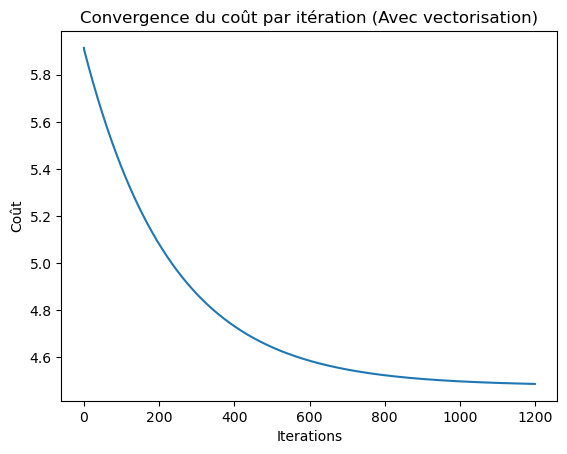

In [382]:
# Traçage du coût en fonction du nombre d'itérations
plt.plot(range(iterations), J_history)
plt.xlabel('Iterations')
plt.ylabel('Coût')
plt.title('Convergence du coût par itération (Avec vectorisation)')
plt.show()

### Réduction relative ≈ 0.860
### Cela signifie que notre modèle a réussi à réduire le coût initial d'environ 86%. C'est une amélioration significative qui montre que le modèle est en train d'apprendre efficacement à partir des données d'entraînement.

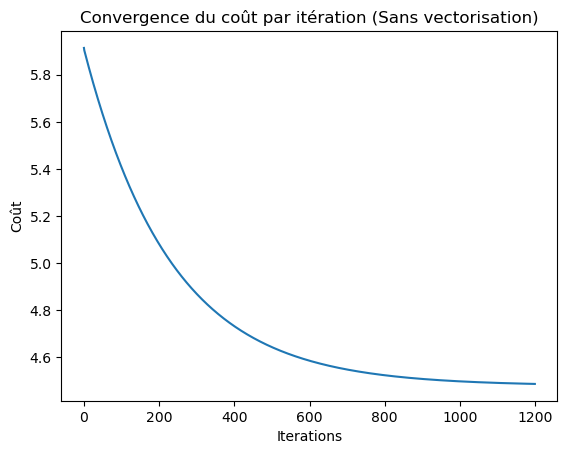

In [383]:
# Traçage du coût en fonction du nombre d'itérations
plt.plot(range(iterations), J_history_non_vect)
plt.xlabel('Iterations')
plt.ylabel('Coût')
plt.title('Convergence du coût par itération (Sans vectorisation)')
plt.show()

Traçage de la ligne de régression linéaire optimale:


Cette ligne correspond à la meilleure approximation linéaire des données d'entraînement obtenue par l'algorithme de descente du gradient

Si la ligne de régression se rapproche des points de données après l'entraînement, cela suggère que le modèle est capable de capturer la tendance générale des données et peut donc être considéré comme un bon ajustement

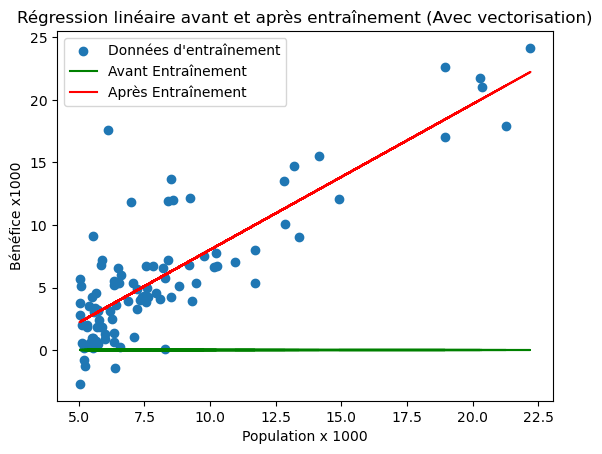

In [384]:
# Affichage de la ligne de régression linéaire avant l'entraînement
plt.scatter(X[:,1], y, marker='o', label='Données d\'entraînement')
plt.plot(X[:,1], np.dot(X, np.zeros(2)), color='green', label='Avant Entraînement')  # Ligne de régression avant entraînement

# Traçage de la ligne de régression linéaire optimale après l'entraînement
y_pred = np.dot(X, theta_optimal)
plt.plot(X[:,1], y_pred, color='red', label='Après Entraînement')  # Ligne de régression après entraînement

plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')
plt.title('Régression linéaire avant et après entraînement (Avec vectorisation)')
plt.legend()
plt.show()

In [385]:
# Traçage de la ligne de régression linéaire optimale sans vectorisation
#y_pred = np.dot(X, theta_optimal_non_vect)
#plt.scatter(X[:,1], y, marker='o')
#plt.plot(X[:,1], y_pred, color='red')
#plt.xlabel('Population x 1000')
#plt.ylabel('Bénéfice x1000')
#plt.title('Régression linéaire après entraînement (Sans vectorisation)')
#plt.show()

Traçage du coût en fonction de theta0 et theta1

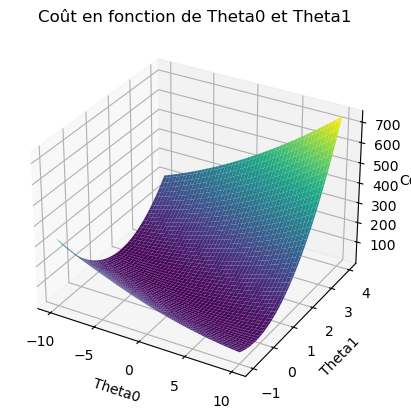

In [386]:
# Affichage de theta0, theta1 et du coût en 3D
# Création de la grille pour theta0 et theta1
theta0_values = np.linspace(-10, 10, 100)
theta1_values = np.linspace(-1, 4, 100)
theta0_mesh, theta1_mesh = np.meshgrid(theta0_values, theta1_values)

# Calcul du coût pour chaque combinaison de theta0 et theta1
cost_values = np.array([computeCost(X, y, [t0, t1]) for t0, t1 in zip(theta0_mesh.ravel(), theta1_mesh.ravel())])
cost_mesh = cost_values.reshape(theta0_mesh.shape)

# Affichage du graphique 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_mesh, theta1_mesh, cost_mesh, cmap='viridis')

ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('Coût')

plt.title('Coût en fonction de Theta0 et Theta1')
plt.show()


In [387]:
import plotly.graph_objects as go

def Plot3DCosts(theta0_values, theta1_values, cost_values):
    fig = go.Figure(data=go.Surface(z=cost_values, x=theta0_values, y=theta1_values))
    fig.update_traces(contours_z=dict(show=True, usecolormap=True, project_z=True))
    fig.update_layout(title="Coût en fonction de Theta0 et Theta1",
                      scene=dict(xaxis_title="Theta0", yaxis_title="Theta1", zaxis_title="Coût"),
                      width=700, height=700)
    fig.show()

# Utilisez les valeurs historiques de theta0, theta1 et les coûts correspondants
Plot3DCosts(theta0_values, theta1_values, cost_mesh)


Prédire des valeurs de y

In [388]:
# Prédiction pour une population de 35,000 et 70,000
population1 = 3.5
population2 = 7
predict1 = np.dot([1, population1], theta_optimal)
predict2 = np.dot([1, population2], theta_optimal)
print("Pour une population de 35,000, le bénéfice prédit est:", predict1)
print("Pour une population de 70,000, le bénéfice prédit est:", predict2)

Pour une population de 35,000, le bénéfice prédit est: 0.47156757562156626
Pour une population de 70,000, le bénéfice prédit est: 4.543211938349446


# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [389]:
import numpy as np
import time
from sklearn.linear_model import LinearRegression

# Régression linéaire à plusieurs variables
# Charger les données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',', dtype=int)
dataMulti.shape


(47, 3)

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [390]:
# d'abord créer X et y
X = dataMulti[:, :2]  # Les deux premières colonnes représentent les caractéristiques (supérficie et nombre de chambres)
y = dataMulti[:, 2]   # La troisième colonne représente le prix de la maison

In [391]:
# redéfinissez vos fonctions de coût si cela est necessaire
# Appliquer la descente du gradient à plusieurs variables

# Fonction de coût MSE
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    square_err = (predictions - y) ** 2
    cost = 1 / (2 * m) * np.sum(square_err)
    return cost


# Fonction de descente de gradient sans normalisation
def gradient_descent_multi_no_scaling(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    initial_cost = compute_cost(X, y, theta)
    
    for i in range(iterations):
        h = np.dot(X, theta)
        error = h - y
        gradient = np.dot(X.T, error) / m
        theta -= alpha * gradient
        cost_history[i] = compute_cost(X, y, theta)
    
    final_cost = cost_history[-1]
    return theta, initial_cost, final_cost, cost_history



In [392]:
# Fonction de descente de gradient avec normalisation
def gradient_descent_multi_with_scaling(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    initial_cost = compute_cost(X, y, theta)
    
    for i in range(iterations):
        h = np.dot(X, theta)
        error = h - y
        gradient = np.dot(X.T, error) / m
        theta -= alpha * gradient
        cost_history[i] = compute_cost(X, y, theta)
    
    final_cost = cost_history[-1]
    return theta, initial_cost, final_cost, cost_history


Normalisation des données en moyenne = 0

In [393]:
# Normalisation des données en moyenne = 0

# Fonction de normalisation des données pour que la moyenne soit égale à zéro
def mean_normalization(X):
    X_normalized = X - np.mean(X, axis=0)
    return X_normalized

X_normalized = mean_normalization(X)


Mise à l'échelle des données

In [394]:
# Mise à l'échelle des données

# Fonction de mise à l'échelle Min-Max pour que les données soient dans l'intervalle [0,1]
def min_max_scaling(X):
    X_scaled = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
    return X_scaled

X_scaled = min_max_scaling(X_normalized)


La mise à l'échelle des données vise à garantir que les caractéristiques sont toutes dans la même plage de valeurs
D'autre part, la normalisation des données en moyenne égale à zéro peut aider à centrer les données autour de zéro.

Dans le contexte de la descente du gradient, la combinaison des deux techniques peut aider à stabiliser la convergence de l'algorithme en garantissant à la fois que les données sont centrées autour de zéro et qu'elles sont dans une plage de valeurs appropriée.

Appliquer la descente du gradient à plusieurs variables

In [395]:
# Appliquer la descente du gradient avec et sans normalisation

# Initialiser les paramètres pour la version sans normalisation
theta_no_scaling = np.random.rand(X_scaled.shape[1] + 1)  # Theta initialisé aléatoirement

# Ajouter une colonne de 1 à gauche de la matrice X pour le terme de biais
X_b_no_scaling = np.c_[np.ones((len(X_scaled), 1)), X_scaled]

# Initialiser les paramètres pour la version avec normalisation
theta_with_scaling = np.random.rand(X_scaled.shape[1] + 1)  # Theta initialisé aléatoirement

# Ajouter une colonne de 1 à gauche de la matrice X pour le terme de biais
X_b_with_scaling = np.c_[np.ones((len(X_scaled), 1)), X_scaled]

# Paramètres de la descente de gradient
alpha = 0.001  # Changement du taux d'apprentissage
iterations = 2000  # Changement du nombre d'itérations


Comparer la descente du gradient avec et sans normalisation
- **Exemple**: voir la difference dans le temps de calcul

In [396]:
# Appliquer la descente du gradient sans normalisation
start_time = time.time()
theta_multi_no_scaling, initial_cost_no_scaling, final_cost_no_scaling, cost_history_multi_no_scaling = gradient_descent_multi_no_scaling(X_b_no_scaling, y, theta_no_scaling, alpha, iterations)
end_time = time.time()

print("Temps d'exécution de la descente du gradient avec plusieurs variables sans normalisation :", end_time - start_time)

# Affichage de theta_multi sans normalisation
print("Theta après la descente du gradient sans normalisation :")
print(theta_multi_no_scaling)

# Affichage du coût initial et final sans normalisation
print("Coût initial sans normalisation:", initial_cost_no_scaling)
print("Coût final sans normalisation:", final_cost_no_scaling)


Temps d'exécution de la descente du gradient avec plusieurs variables sans normalisation : 0.3280026912689209
Theta après la descente du gradient sans normalisation :
[220474.33276977 105009.55073316 130521.14687152]
Coût initial sans normalisation: 65591238970.91622
Coût final sans normalisation: 4898984117.660824


In [397]:
# Appliquer la descente du gradient avec normalisation
start_time = time.time()
theta_multi_with_scaling, initial_cost_with_scaling, final_cost_with_scaling, cost_history_multi_with_scaling = gradient_descent_multi_with_scaling(X_b_with_scaling, y, theta_with_scaling, alpha, iterations)
end_time = time.time()

print("Temps d'exécution de la descente du gradient avec plusieurs variables avec normalisation :", end_time - start_time)

# Affichage de theta_multi avec normalisation
print("Theta après la descente du gradient avec normalisation :")
print(theta_multi_with_scaling)

# Affichage du coût initial et final avec normalisation
print("Coût initial avec normalisation:", initial_cost_with_scaling)
print("Coût final avec normalisation:", final_cost_with_scaling)


Temps d'exécution de la descente du gradient avec plusieurs variables avec normalisation : 0.1329958438873291
Theta après la descente du gradient avec normalisation :
[220474.60689219 105009.76493482 130520.55073664]
Coût initial avec normalisation: 65591172395.83816
Coût final avec normalisation: 4898982559.38369


In [398]:
# Comparer les algorithmes de descente du gradient avec et sans normalisation
# Calculer le pourcentage de convergence pour la descente du gradient sans normalisation
convergence_percentage_no_scaling = (1 - cost_history_multi_no_scaling[-1] / cost_history_multi_no_scaling[0]) * 100

# Calculer le pourcentage de convergence pour la descente du gradient avec normalisation
convergence_percentage_with_scaling = (1 - cost_history_multi_with_scaling[-1] / cost_history_multi_with_scaling[0]) * 100

print("Pourcentage de convergence sans normalisation:", convergence_percentage_no_scaling)
print("Pourcentage de convergence avec normalisation:", convergence_percentage_with_scaling)




Pourcentage de convergence sans normalisation: 92.51152961656474
Pourcentage de convergence avec normalisation: 92.51152439899988


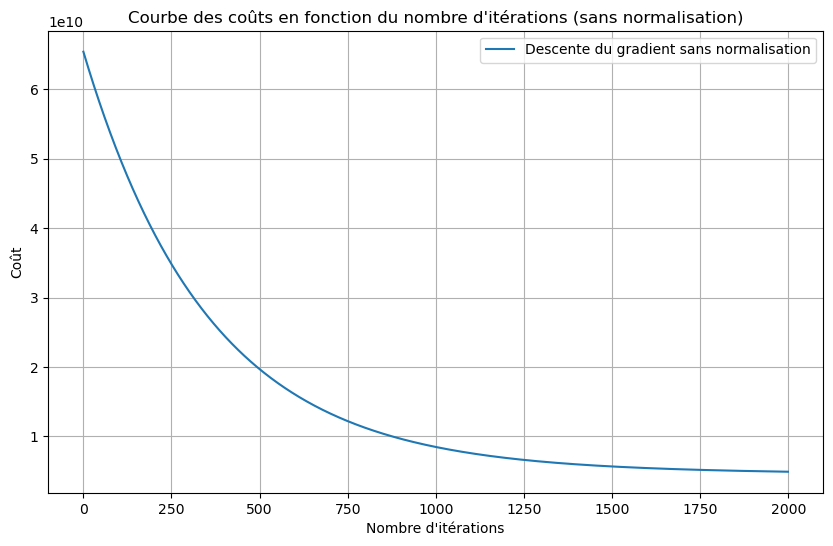

In [399]:
import matplotlib.pyplot as plt

# Tracer la courbe des coûts en fonction du nombre d'itérations pour la descente de gradient sans normalisation
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history_multi_no_scaling, label='Descente du gradient sans normalisation')
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Coût')
plt.title('Courbe des coûts en fonction du nombre d\'itérations (sans normalisation)')
plt.legend()
plt.grid(True)
plt.show()


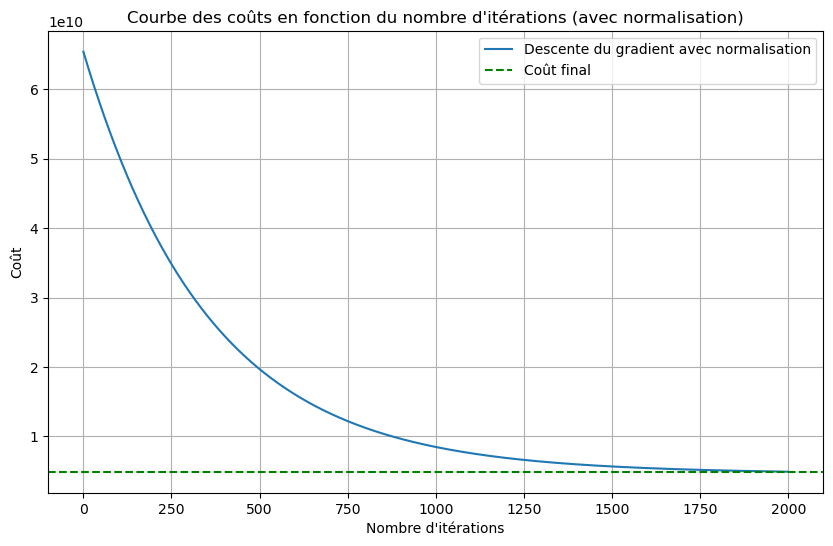

In [400]:
# Tracer la courbe des coûts en fonction du nombre d'itérations pour la descente de gradient avec normalisation
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history_multi_with_scaling, label='Descente du gradient avec normalisation')
plt.axhline(y=final_cost_with_scaling, color='g', linestyle='--', label='Coût final ')
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Coût')
plt.title('Courbe des coûts en fonction du nombre d\'itérations (avec normalisation)')
plt.legend()
plt.grid(True)
plt.show()


# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

Coefficients du modèle scikit-learn (sans normalisation):
Intercept: 89597.76596099927
Coefficients: [  139.21063465 -8737.91542019]
Coût initial (sans normalisation): 7651160131.281121
Coût final (sans normalisation): 2043280477.3925698
Temps d'exécution de la régression linéaire avec scikit-learn: 0.0019969940185546875


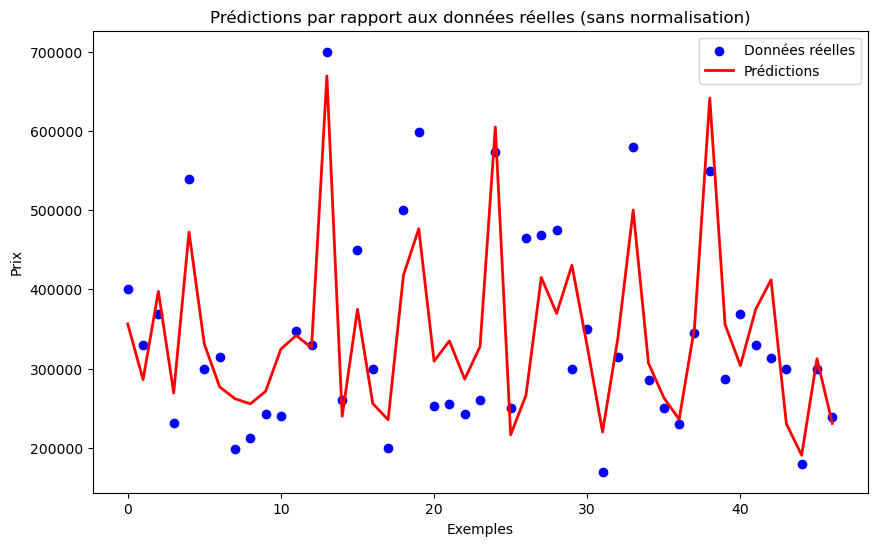

In [401]:
import numpy as np
import time
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Charger les données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',', dtype=int)

# Séparer les caractéristiques (X) et les étiquettes (y)
X = dataMulti[:, :2]  # Caractéristiques : supérficie et nombre de chambres
y = dataMulti[:, 2]   # Étiquettes : prix de la maison

# Initialiser le modèle de régression linéaire de scikit-learn
model = LinearRegression()

# Temps d'exécution et entraînement du modèle avec les données non normalisées
start_time = time.time()
model.fit(X, y)
end_time = time.time()

# Afficher les coefficients du modèle
print("Coefficients du modèle scikit-learn (sans normalisation):")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Prédiction des étiquettes avec le modèle entraîné
y_pred = model.predict(X)

# Calculer le coût initial et final
initial_cost = np.mean((y - np.mean(y_pred)) ** 2) / 2
final_cost = np.mean((y - y_pred) ** 2) / 2

print("Coût initial (sans normalisation):", initial_cost)
print("Coût final (sans normalisation):", final_cost)

# Temps d'exécution de la régression linéaire avec scikit-learn
print("Temps d'exécution de la régression linéaire avec scikit-learn:", end_time - start_time)

# Tracer la courbe des coûts
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='blue', label='Données réelles')
plt.plot(range(len(y)), y_pred, color='red', linewidth=2, label='Prédictions')
plt.xlabel('Exemples')
plt.ylabel('Prix')
plt.title('Prédictions par rapport aux données réelles (sans normalisation)')
plt.legend()
plt.show()


Coefficients du modèle scikit-learn (avec normalisation et mise à l'échelle):
Intercept: 199467.31126290318
Coefficients: [504777.76124214 -34951.66168075]
Coût initial (avec normalisation et mise à l'échelle): 7651160131.28112
Coût final (avec normalisation et mise à l'échelle): 2043280477.3925707


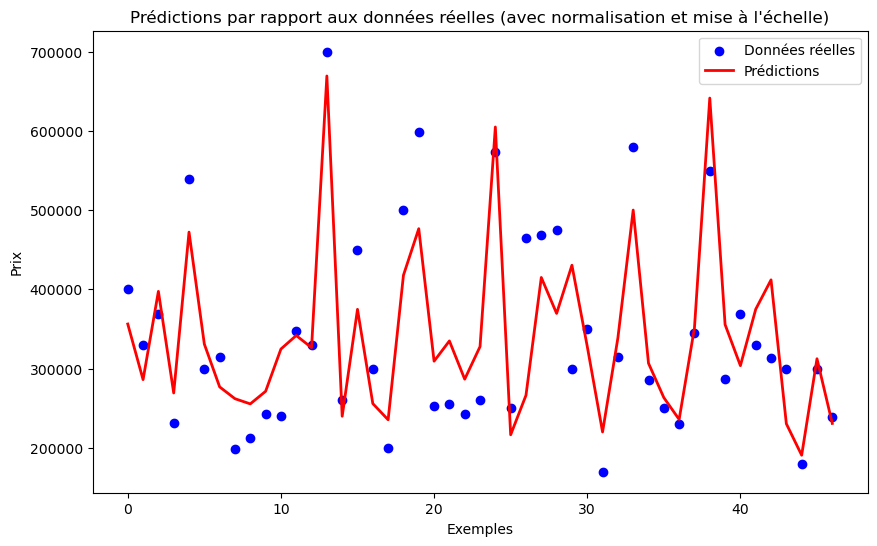

In [402]:
import numpy as np
import time
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Charger les données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',', dtype=int)

# Séparer les caractéristiques (X) et les étiquettes (y)
X = dataMulti[:, :2]  # Caractéristiques : supérficie et nombre de chambres
y = dataMulti[:, 2]   # Étiquettes : prix de la maison

# Normalisation des données en moyenne = 0
def mean_normalization(X):
    X_normalized = X - np.mean(X, axis=0)
    return X_normalized

X_normalized = mean_normalization(X)

# Mise à l'échelle des données dans l'intervalle [0,1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_normalized)

# Initialiser le modèle de régression linéaire de scikit-learn
model = LinearRegression()

# Temps d'exécution et entraînement du modèle avec les données normalisées et mises à l'échelle
start_time = time.time()
model.fit(X_scaled, y)
end_time = time.time()

# Afficher les coefficients du modèle
print("Coefficients du modèle scikit-learn (avec normalisation et mise à l'échelle):")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Prédiction des étiquettes avec le modèle entraîné
y_pred = model.predict(X_scaled)

# Calculer le coût initial et final
initial_cost = np.mean((y - np.mean(y_pred)) ** 2) / 2
final_cost = np.mean((y - y_pred) ** 2) / 2

print("Coût initial (avec normalisation et mise à l'échelle):", initial_cost)
print("Coût final (avec normalisation et mise à l'échelle):", final_cost)

# Tracer la courbe des coûts
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='blue', label='Données réelles')
plt.plot(range(len(y)), y_pred, color='red', linewidth=2, label='Prédictions')
plt.xlabel('Exemples')
plt.ylabel('Prix')
plt.title('Prédictions par rapport aux données réelles (avec normalisation et mise à l\'échelle)')
plt.legend()
plt.show()


### Dans notre cas,  les coûts finaux sont très proches avec et sans normalisation, cela suggère que vnotre modèle de régression linéaire n'est pas fortement influencé par les différences d'échelle entre les caractéristiques.

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

### 1-Augmentation de données:

Si vos données d'entraînement sont limitées, vous pouvez envisager d'augmenter vos données en appliquant des transformations telles que la rotation, le zoom, le décalage, etc., pour créer de nouvelles instances d'apprentissage.



### 2- Feature engineering:

Explorez différentes transformations et combinaisons de caractéristiques pour créer de nouvelles caractéristiques qui pourraient mieux capturer les relations entre les données et améliorer les performances du modèle.


### 3-Validation croisée: 
La validation croisée, également appelée validation croisée k-fold, est une technique d'évaluation de la performance d'un modèle prédictif qui permet d'estimer à quel point le modèle est capable de généraliser à de nouvelles données non vues. Elle est souvent utilisée pour estimer la performance d'un modèle lorsque le jeu de données est limité.

Voici comment fonctionne la validation croisée k-fold :

*Division du jeu de données :

Tout d'abord, le jeu de données est divisé en k sous-ensembles (ou "folds") de taille égale.

*Entraînement et évaluation :

Ensuite, le modèle est entraîné k fois. À chaque itération, un des k sous-ensembles est retenu comme ensemble de validation et les autres k-1 sous-ensembles sont utilisés comme ensemble d'entraînement.
Le modèle est entraîné sur les données d'entraînement et évalué sur l'ensemble de validation.

*Calcul de la performance :

Une fois que chaque sous-ensemble a été utilisé comme ensemble de validation exactement une fois, les performances du modèle sur chaque itération sont généralement moyennées pour obtenir une estimation globale de la performance du modèle.
Evaluation finale :

Enfin, une fois que toutes les itérations sont terminées, la performance finale du modèle est calculée à partir de toutes les performances évaluées lors de chaque itération.

La validation croisée permet une évaluation plus fiable de la performance du modèle car elle utilise l'ensemble du jeu de données pour l'entraînement et l'évaluation, ce qui réduit le risque de surajustement par rapport à une simple division des données en ensembles d'entraînement et de test. Cela permet également d'obtenir une estimation plus stable de la performance du modèle, car elle est basée sur plusieurs itérations avec des ensembles de données différents.

### 4- Ensemble learning:

Expérimenter avec des techniques d'ensemble telles que le bagging, le boosting et les forêts aléatoires pour combiner les prédictions de plusieurs modèles et améliorer la robustesse et la performance générale du modèle.

Les techniques d'ensemble, telles que le bagging, le boosting et les forêts aléatoires, sont des méthodes qui combinent les prédictions de plusieurs modèles individuels pour améliorer la performance globale du modèle. Voici une explication de chacune de ces techniques :

### Bagging (Bootstrap Aggregating) :

Le bagging consiste à entraîner plusieurs modèles d'apprentissage indépendants sur des sous-ensembles aléatoires de données (échantillons bootstrap) tirés du jeu de données d'entraînement.
Ensuite, les prédictions de ces modèles individuels sont combinées par moyenne (pour la régression) ou par vote majoritaire (pour la classification) pour obtenir la prédiction finale.
Le bagging réduit la variance et le risque de surajustement, car les modèles sont entraînés sur des sous-ensembles de données différents.

----------
### Boosting :

Le boosting est une méthode itérative où les modèles sont entraînés séquentiellement de manière à corriger les erreurs des modèles précédents.
Lors de chaque itération, les poids des échantillons mal classés sont augmentés, de sorte que les modèles suivants se concentrent davantage sur ces échantillons difficiles.
Les prédictions de chaque modèle individuel sont pondérées en fonction de leur performance lors de la combinaison pour former la prédiction finale.
Le boosting est efficace pour réduire le biais et améliorer la précision, en particulier dans les situations où les modèles individuels sont faibles.


### Forêts aléatoires :

Les forêts aléatoires sont une extension du bagging, où plusieurs arbres de décision sont entraînés sur des sous-ensembles aléatoires de données, mais avec une petite différence.
Pour chaque arbre de décision, lors de la construction de chaque nœud, une sélection aléatoire d'attributs est prise en compte pour déterminer le meilleur split, ce qui rend chaque arbre différent.
Les prédictions des arbres individuels sont ensuite combinées par vote majoritaire pour obtenir la prédiction finale.
Les forêts aléatoires sont très efficaces pour la classification et la régression, et elles sont robustes aux valeurs aberrantes et au surajustement.



En résumé, le bagging, le boosting et les forêts aléatoires sont toutes des techniques d'ensemble puissantes qui peuvent être utilisées pour améliorer la performance des modèles en combinant les prédictions de plusieurs modèles individuels. Chaque technique a ses propres avantages et inconvénients, et le choix entre elles dépend souvent de la nature du problème et des données.